## <h1><center>IE 345 - K “Introduction to Deep Learning: Fundamentals Concepts” </center></h1>
### Prof. Yuzo
#### Build a Convolutional Neural Network.
##### pg. 92 - 100

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
# Set Hyperparameters

batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
#Load Data and split into train and test sets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train.shape:', x_train.shape)
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0], 'Test samples')

x_train.shape: (50000, 32, 32, 3)
50000 Train samples
10000 Test samples


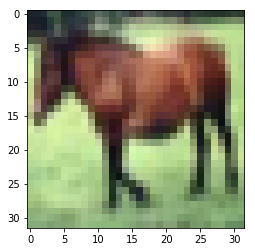

In [4]:
# Display image
sample_image = x_train[7]
plt.imshow(sample_image)
plt.show()

In [5]:
# Convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Describe model using Keras sequential API
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [7]:
# Initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

#Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
             metrics=['accuracy'])

In [8]:
# Normalize image date
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data=(x_test, y_test),
             shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(featurewise_center=False,
                                samplewise_center=False,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=False,
                                zca_whitening=False,
                                rotation_range=0,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=False)
    
    datagen.fit(x_train)
    model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                       epochs=epochs,
                       validation_data=(x_test,y_test),
                       workers=4,
                       steps_per_epoch=5)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 185s 4ms/step - loss: 1.8621 - acc: 0.3201 - val_loss: 1.5802 - val_acc: 0.4297
Epoch 2/25
50000/50000 [==============================] - 185s 4ms/step - loss: 1.5406 - acc: 0.4437 - val_loss: 1.4813 - val_acc: 0.4577
Epoch 3/25
50000/50000 [==============================] - 199s 4ms/step - loss: 1.3878 - acc: 0.4998 - val_loss: 1.2643 - val_acc: 0.5447
Epoch 4/25
50000/50000 [==============================] - 198s 4ms/step - loss: 1.2840 - acc: 0.5431 - val_loss: 1.2150 - val_acc: 0.5639
Epoch 5/25
50000/50000 [==============================] - 190s 4ms/step - loss: 1.2044 - acc: 0.5731 - val_loss: 1.0948 - val_acc: 0.6166
Epoch 6/25
50000/50000 [==============================] - 187s 4ms/step - loss: 1.1348 - acc: 0.5986 - val_loss: 1.0522 - val_acc: 0.6263
Epoch 7/25
50000/50000 [==============================] - 191s 4ms/step - loss: 1.0736 - acc:

In [ ]:
# Save model and weights for future use

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
#Score trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

*Pablo David Minango Negrete*

$pablodavid218@gmail.com$